In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading dataset
df = pd.read_csv(r'C:\Users\user\ML_portfolio\Machine-Learning-Projects\Student_performance_prediction\notebook\stud.csv')

In [5]:
# top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data checks
1. Check missing values
2. check duplicates
3. check data types
4. check categories in categorical features
5. statistical summary of data
6. unique values in each column

In [6]:
# checking missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values present in data

In [7]:
#checking duplicates
df.duplicated().sum()

0

There are no duplicate values in data

In [8]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking unique values in each column
df.nunique()  

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#statistical summary
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insights:
1. All means are close to each other between 66 and 69
2. As compare to other subjects the minimum marks for maths are much lower
3. Max marks for all subjects are 100
4. Variation in marks for each subject is around 14 and 15

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
# checking unique categories 
print('Categories in gender', end=":")
print(df['gender'].unique())

print('Categories in race_ethnicity', end=":")
print(df['race_ethnicity'].unique())

print('Categories in parental_level_of_education', end=":")
print(df['parental_level_of_education'].unique())

print('Categories in lunch', end=":")
print(df['lunch'].unique())


print('Categories in test_preparation_course',end=":")
print(df['test_preparation_course'].unique())

Categories in gender:['female' 'male']
Categories in race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch:['standard' 'free/reduced']
Categories in test_preparation_course:['none' 'completed']


In [13]:
#creating total score and avg score column
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['avg_score']=df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
#exploring data 
maths_full=(df['math_score']==100).sum()
writing_full=(df['writing_score']==100).sum()
reading_full=(df['reading_score']==100).sum()
maths_zero=(df['math_score']==0).sum()

In [15]:
print('{} students got full marks in maths '.format(maths_full))
print('{} students got full marks in writing '.format(writing_full))
print('{} students got full marks in  reading'.format(reading_full))
print('{} students got 0 marks in maths '.format(maths_zero))

7 students got full marks in maths 
14 students got full marks in writing 
17 students got full marks in  reading
1 students got 0 marks in maths 


Insights: Students performed best in reading section

<Axes: xlabel='avg_score', ylabel='Count'>

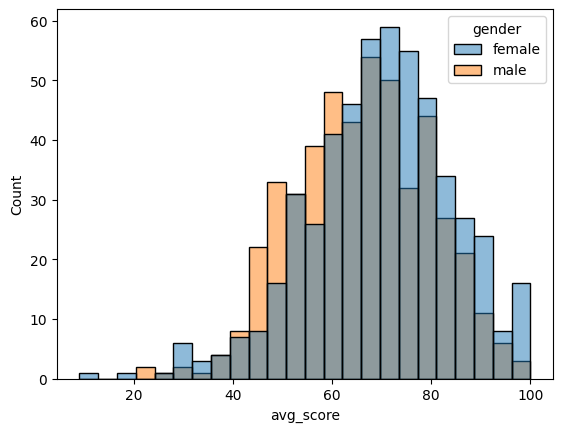

In [16]:
# Visualizing data
sns.histplot(data=df, x=df['avg_score'],hue=df['gender'])

Insight: Female students performed well then male students

<Axes: xlabel='race_ethnicity', ylabel='avg_score'>

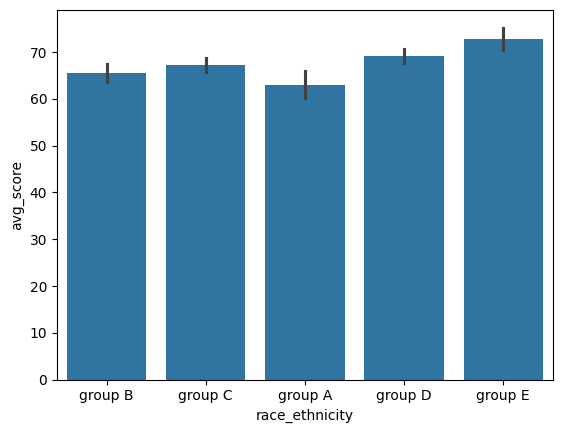

In [17]:
sns.barplot(x=df['race_ethnicity'],y=df['avg_score'])

Insight: Group E performed well amonng other groups

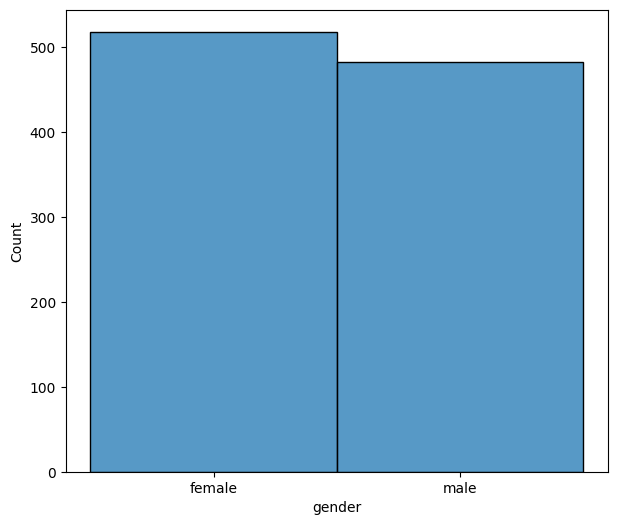

In [18]:
plt.figure(figsize=(7, 6))
sns.histplot(x=df['gender'])
plt.show()

Female students are more than male students

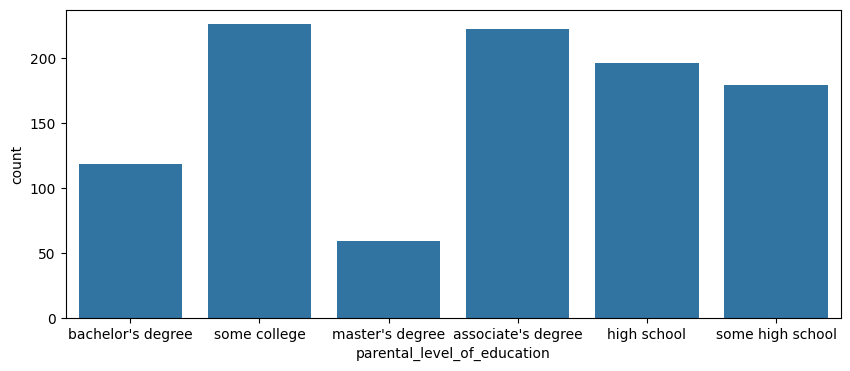

In [28]:
plt.figure(figsize=(10, 4))
sns.countplot(x=df['parental_level_of_education'])
plt.show()

Mostly parents have some college or associate degree

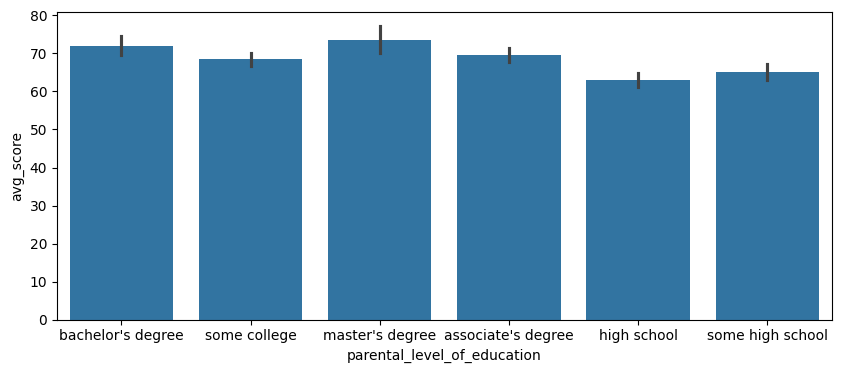

In [31]:
plt.figure(figsize=(10, 4))
sns.barplot(x=df['parental_level_of_education'],y=df['avg_score'])
plt.show()

Insight: Students whose parents have a master's or bachelors degree performed better.

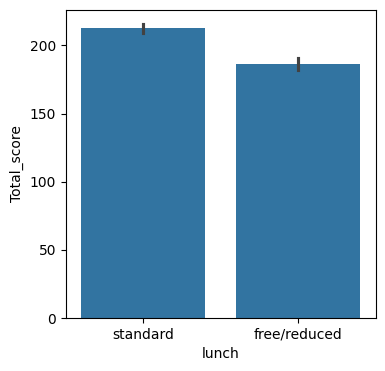

In [37]:
plt.figure(figsize=(4, 4))
sns.barplot(x=df['lunch'], y=df['Total_score'])
plt.show()

Insight: Students having standard lunch performed better in exams.